In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from tqdm import tqdm

This file path may have to be changed

In [ ]:
df = pd.read_excel('second_deployment_data.xlsx')

In [14]:
df.head()

,timestamp,lux,irradiance,nir_image_path,temperature,humidity,rgb_image_path
0,2025-04-07_14-36-00,43590.390625,363.253255,/photos_nir/2025-04-07_14-36-00_nir.jpg,26.180285,44.803006,/photos_rgb/2025-04-07_14-36-00_rgb.jpg
1,2025-04-07_14-37-00,43257.968750,360.483073,/photos_nir/2025-04-07_14-37-00_nir.jpg,26.431296,50.176089,/photos_rgb/2025-04-07_14-37-00_rgb.jpg
2,2025-04-07_14-38-00,43062.109375,358.850911,/photos_nir/2025-04-07_14-38-00_nir.jpg,27.026780,52.653773,/photos_rgb/2025-04-07_14-38-00_rgb.jpg
3,2025-04-07_14-39-00,42988.437500,358.236979,/photos_nir/2025-04-07_14-39-00_nir.jpg,27.592889,43.172198,/photos_rgb/2025-04-07_14-39-00_rgb.jpg
4,2025-04-07_14-40-00,42515.859375,354.298828,/photos_nir/2025-04-07_14-40-00_nir.jpg,27.750439,46.204929,/photos_rgb/2025-04-07_14-40-00_rgb.jpg


In [15]:
statistical_cols = ['irradiance', 'temperature', 'humidity']

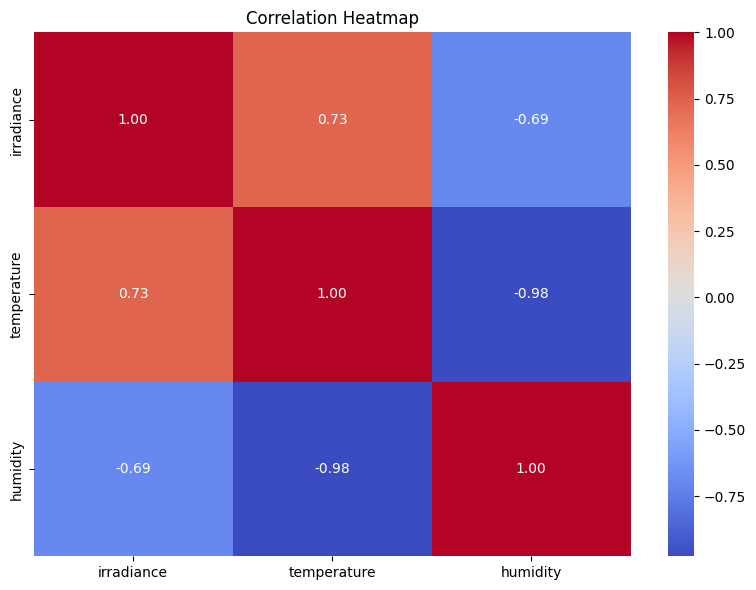

In [16]:
plt.figure(figsize=(8, 6))
corr_matrix = df[statistical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

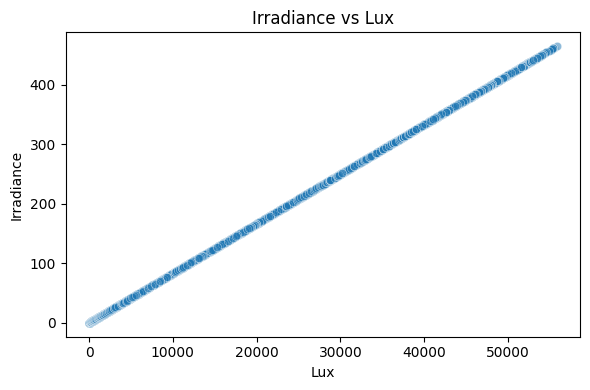

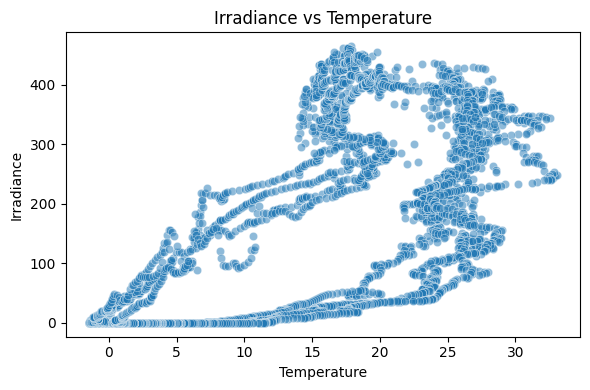

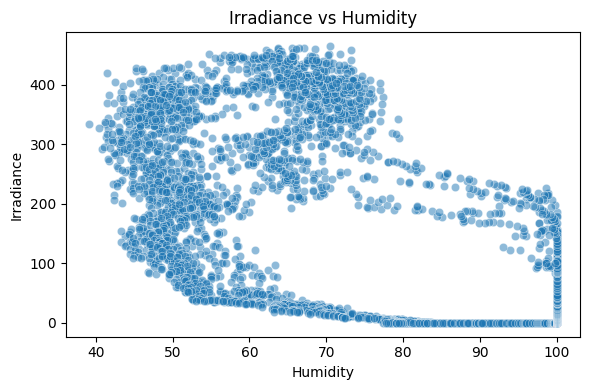

In [17]:
for col in ['lux', 'temperature', 'humidity']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['irradiance'], alpha=0.5)
    plt.xlabel(col.capitalize())
    plt.ylabel("Irradiance")
    plt.title(f"Irradiance vs {col.capitalize()}")
    plt.tight_layout()
    plt.show()

I want to exctract some image features to compare them to irradiance

In [48]:
# Lists to store features
nir_brightness = []
nir_brightness_std = []
nir_red_mean = []

rgb_brightness = []
rgb_brightness_std = []
rgb_red_mean = []
rgb_green_mean = []
rgb_blue_mean = []

In [51]:
print(len(nir_brightness), len(nir_brightness_std), len(nir_red_mean), len(rgb_brightness), len(rgb_brightness_std), len(rgb_red_mean), len(rgb_green_mean), len(rgb_blue_mean))

0 0 0 0 0 0 0 0


In [52]:
import os

nir_paths = []
rgb_paths = []

for path in df['nir_image_path']:
    # get only the filename from the path
    filename = os.path.basename(path)
    # make new path with the correct directory
    nir_paths.append(os.path.join('photos_nir', filename))

for path in df['rgb_image_path']:
    # get only the filename from the path
    filename = os.path.basename(path)
    # make new path with the correct directory
    rgb_paths.append(os.path.join('photos_rgb', filename))

df['nir_image_path'] = nir_paths
df['rgb_image_path'] = rgb_paths


In [53]:
len(nir_paths)

5723

In [55]:
len(df['lux'])

5723

In [56]:
# Loop through rows in the DataFrame
for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing images"):
    # load nir images
    nir_color = cv2.imread(row['nir_image_path'])
    if nir_color is not None:
        nir_gray = cv2.cvtColor(nir_color, cv2.COLOR_BGR2GRAY)
        nir_color_rgb = cv2.cvtColor(nir_color, cv2.COLOR_BGR2RGB)
        nir_r, _, _ = cv2.split(nir_color_rgb)

        # NIR features
        nir_brightness.append(np.mean(nir_gray))
        nir_brightness_std.append(np.std(nir_gray))
        nir_red_mean.append(np.mean(nir_r))
    else:
        print(f"Image not found: {row['nir_image_path']}")
        nir_brightness.append(np.nan)
        nir_brightness_std.append(np.nan)
        nir_red_mean.append(np.nan)

    # also handle the rgb images
    rgb_img = cv2.imread(row['rgb_image_path'])
    if rgb_img is not None:
        rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
        rgb_gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
        r, g, b = cv2.split(rgb_img)

        # RGB features
        rgb_brightness.append(np.mean(rgb_gray))
        rgb_brightness_std.append(np.std(rgb_gray))
        rgb_red_mean.append(np.mean(r))
        rgb_green_mean.append(np.mean(g))
        rgb_blue_mean.append(np.mean(b))

    else:
        print(f"Image not found: {row['rgb_image_path']}")
        rgb_brightness.append(np.nan)
        rgb_brightness_std.append(np.nan)
        rgb_red_mean.append(np.nan)
        rgb_green_mean.append(np.nan)
        rgb_blue_mean.append(np.nan)



Processing images: 100%|██████████| 5723/5723 [41:43<00:00,  2.29it/s]


In [57]:
print(nir_brightness[5:])

[88.80494993763858, 88.8165625247466, 89.10212932075547, 89.1955623168752, 89.20771673067786, 89.09933357420019, 89.51038317627494, 89.40754523677542, 89.59820042762117, 89.40418798998257, 89.30780742694805, 89.5118089513383, 89.1939390639848, 89.44938059273044, 89.4131486082515, 89.63189848451853, 89.65631137155528, 90.24629964166931, 90.25098776033418, 90.1443350095027, 90.30191464404498, 90.3584427957713, 90.03129305907507, 90.24930127989388, 89.88406368783656, 89.74915638858093, 89.79156190608172, 89.7868600530567, 89.98272724798068, 89.86134136442826, 89.97279445973234, 89.84046600312797, 89.77027822596611, 89.60763110745961, 89.25998277636997, 89.27935886522015, 89.39597434767975, 89.77811015204308, 89.11968232796167, 89.38515798226165, 89.41070030388819, 89.40576991605955, 89.48741054105955, 89.2702960435144, 89.07923909170098, 89.05856467275103, 88.90981128246753, 88.99788070161546, 88.8491275587979, 88.87582987705892, 88.92620565410199, 88.57551274944568, 88.75990321606747, 88

In [58]:
len(nir_brightness), len(nir_brightness_std), len(nir_red_mean), len(rgb_brightness), len(rgb_brightness_std), len(rgb_red_mean), len(rgb_green_mean), len(rgb_blue_mean)

(5723, 5723, 5723, 5723, 5723, 5723, 5723, 5723)

In [59]:
df['nir_brightness'] = nir_brightness
df['nir_brightness_std'] = nir_brightness_std
df['nir_red_mean'] = nir_red_mean

df['rgb_brightness'] = rgb_brightness
df['rgb_brightness_std'] = rgb_brightness_std
df['rgb_red_mean'] = rgb_red_mean
df['rgb_green_mean'] = rgb_green_mean
df['rgb_blue_mean'] = rgb_blue_mean

In [60]:
print(df[['nir_brightness', 'nir_red_mean', 'rgb_red_mean', 'rgb_green_mean', 'rgb_blue_mean']].head())

   nir_brightness  nir_red_mean  rgb_red_mean  rgb_green_mean  rgb_blue_mean
0       88.719159     87.732069     69.411107       99.972877     168.441784
1       88.785822     87.798808     69.290274       99.899045     168.595638
2       88.893118     87.906152     69.125811       99.654726     168.339079
3       88.904472     87.917586     69.388529       99.747513     168.105650
4       88.994412     88.007751     69.483923       99.796154     168.380114


In [61]:
print(df.columns)

Index(['timestamp', 'lux', 'irradiance', 'nir_image_path', 'temperature',
       'humidity', 'rgb_image_path', 'nir_brightness', 'nir_red_mean',
       'rgb_red_mean', 'rgb_green_mean', 'rgb_blue_mean', 'nir_brightness_std',
       'rgb_brightness', 'rgb_brightness_std'],
      dtype='object')


In [62]:
df.to_csv('data_with_camera_info.csv', index=False)

In [63]:
data = pd.read_csv('data_with_camera_info.csv')
print(data.head())

             timestamp           lux  irradiance  \
0  2025-04-07_14-36-00  43590.390625  363.253255   
1  2025-04-07_14-37-00  43257.968750  360.483073   
2  2025-04-07_14-38-00  43062.109375  358.850911   
3  2025-04-07_14-39-00  42988.437500  358.236979   
4  2025-04-07_14-40-00  42515.859375  354.298828   

                           nir_image_path  temperature   humidity  \
0  photos_nir\2025-04-07_14-36-00_nir.jpg    26.180285  44.803006   
1  photos_nir\2025-04-07_14-37-00_nir.jpg    26.431296  50.176089   
2  photos_nir\2025-04-07_14-38-00_nir.jpg    27.026780  52.653773   
3  photos_nir\2025-04-07_14-39-00_nir.jpg    27.592889  43.172198   
4  photos_nir\2025-04-07_14-40-00_nir.jpg    27.750439  46.204929   

                           rgb_image_path  nir_brightness  nir_red_mean  \
0  photos_rgb\2025-04-07_14-36-00_rgb.jpg       88.719159     87.732069   
1  photos_rgb\2025-04-07_14-37-00_rgb.jpg       88.785822     87.798808   
2  photos_rgb\2025-04-07_14-38-00_rgb.jpg      

In [70]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.drop(columns=['lux'])
print(numeric_data.columns)

Index(['irradiance', 'temperature', 'humidity', 'nir_brightness',
       'nir_red_mean', 'rgb_red_mean', 'rgb_green_mean', 'rgb_blue_mean',
       'nir_brightness_std', 'rgb_brightness', 'rgb_brightness_std'],
      dtype='object')


This shows that nir_brightness and nir_red_mean are different, 

In [72]:
diffs = np.abs(numeric_data['nir_brightness'] - numeric_data['nir_red_mean'])
print("Average difference:", np.mean(diffs))
print("Max difference:", np.max(diffs))

Average difference: 0.9502417368936084
Max difference: 1.0000000000000018


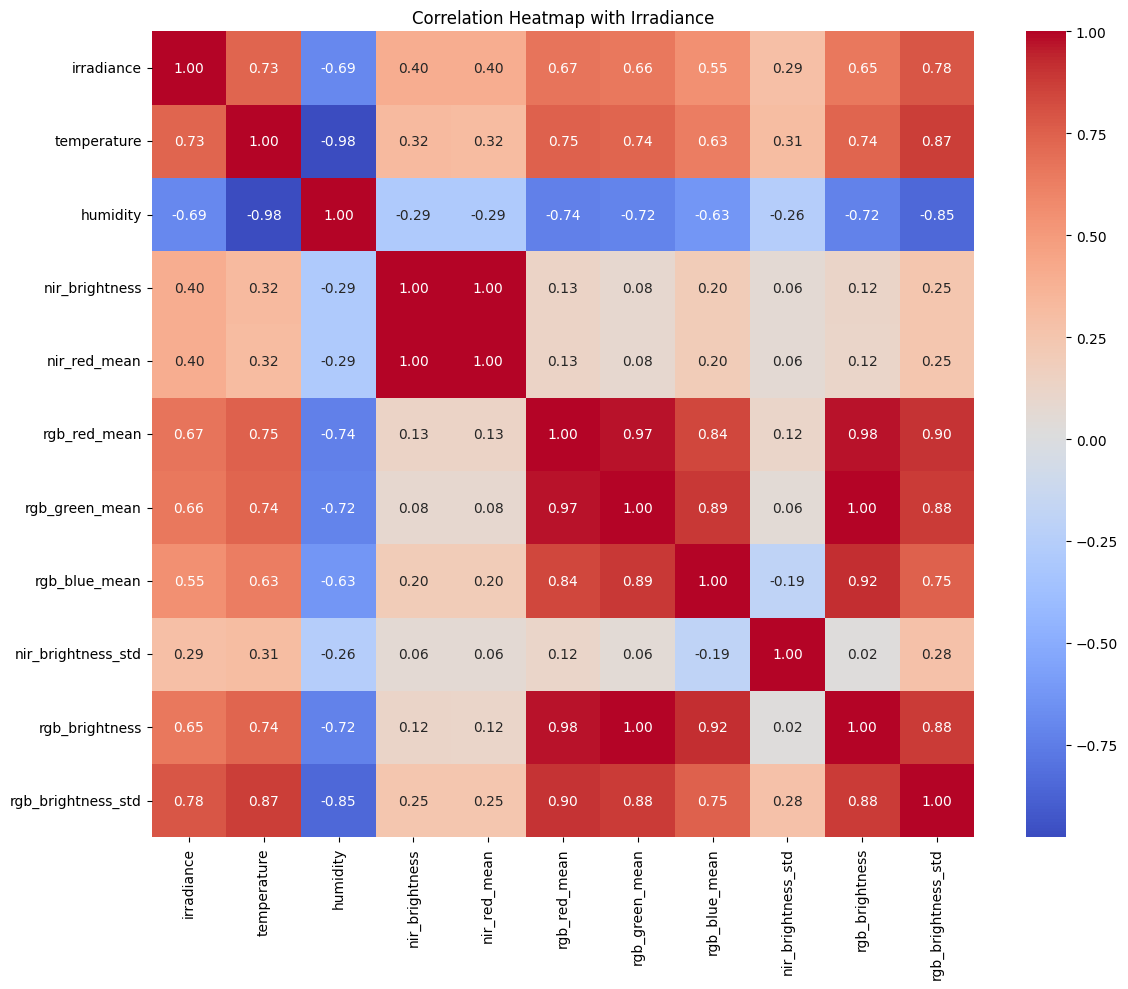

In [71]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Irradiance")
plt.tight_layout()
plt.show()

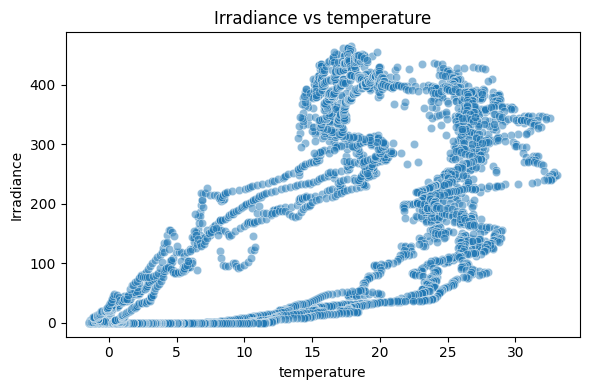

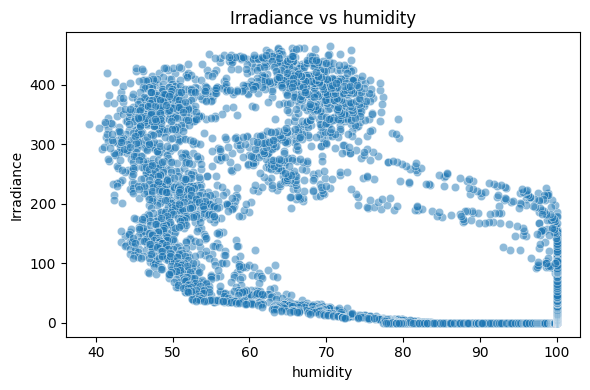

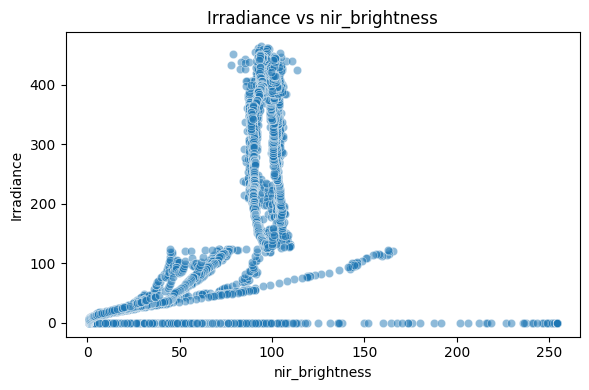

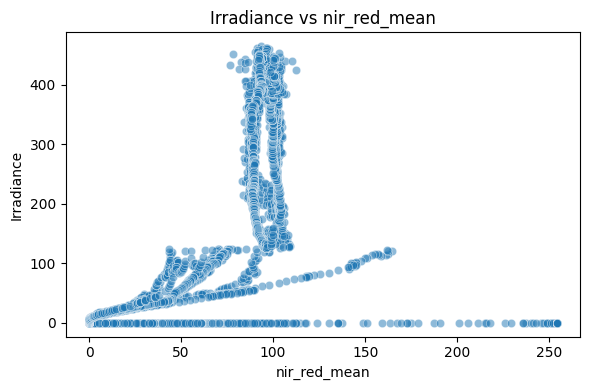

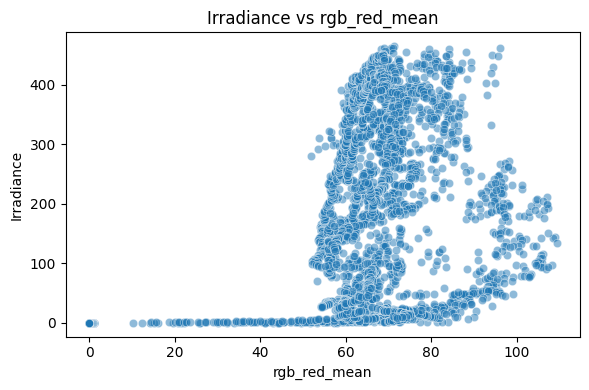

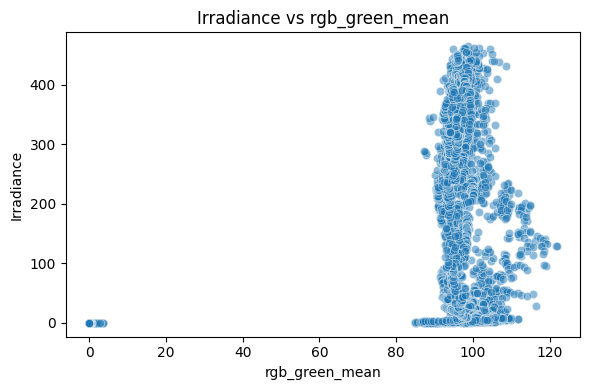

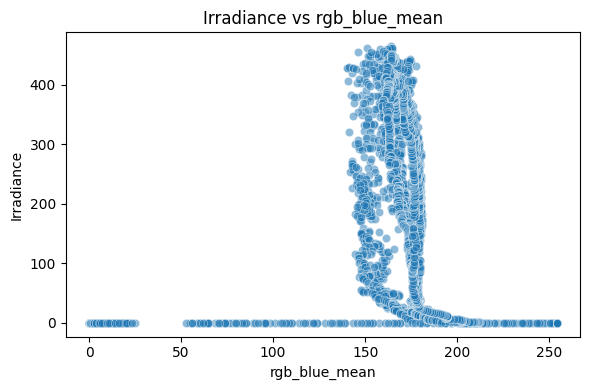

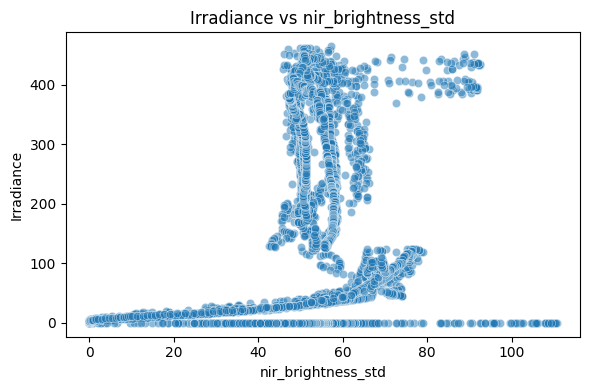

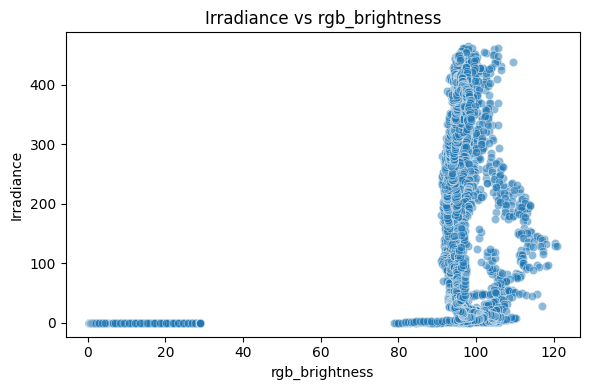

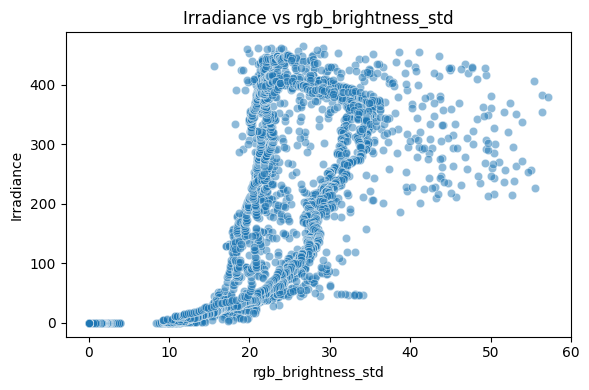

In [73]:
for col in numeric_data.columns:
    if col != 'irradiance':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['irradiance'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("Irradiance")
        plt.title(f"Irradiance vs {col}")
        plt.tight_layout()
        plt.show()